In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
df = pd.read_csv('./data/HR_Cleaned.csv')
# Note: most code in this notebook came from ChatGPT for ease of getting things done quickly

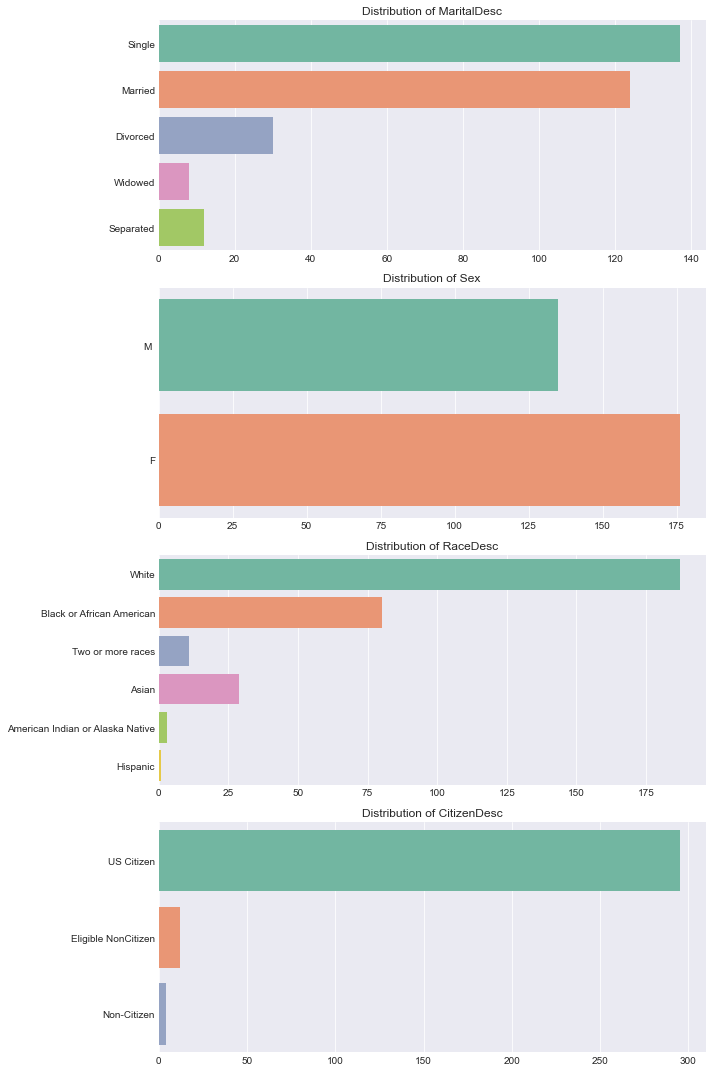

In [2]:
# Setting up the visualization
plt.style.use('seaborn-darkgrid')
palette = sns.color_palette("Set2")

# Preparing data for demographic analysis
demographic_columns = ['MaritalDesc', 'Sex', 'RaceDesc', 'CitizenDesc']

# Plotting demographic distributions
fig, axes = plt.subplots(len(demographic_columns), 1, figsize=(10, 15))

for i, col in enumerate(demographic_columns):
    sns.countplot(y=col, data=df, ax=axes[i], palette=palette)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


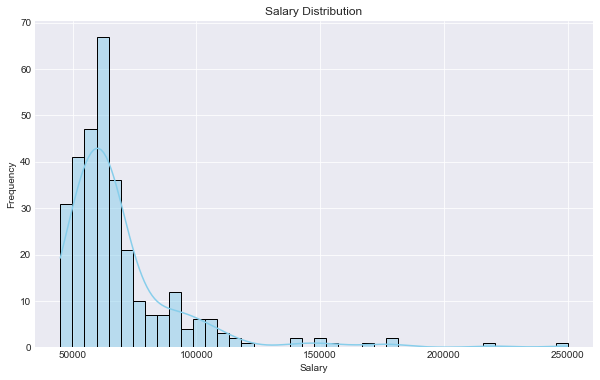

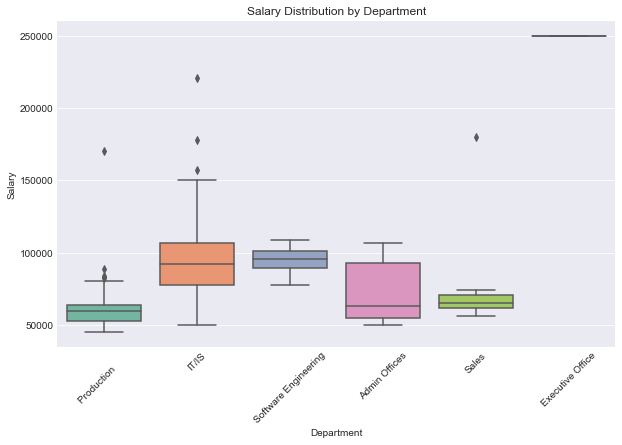

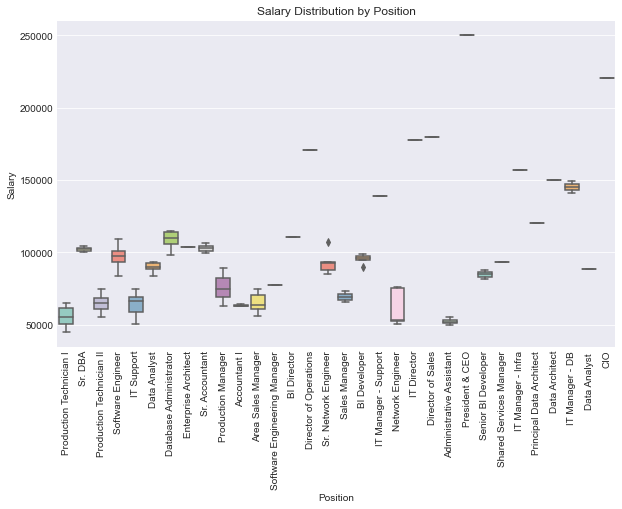

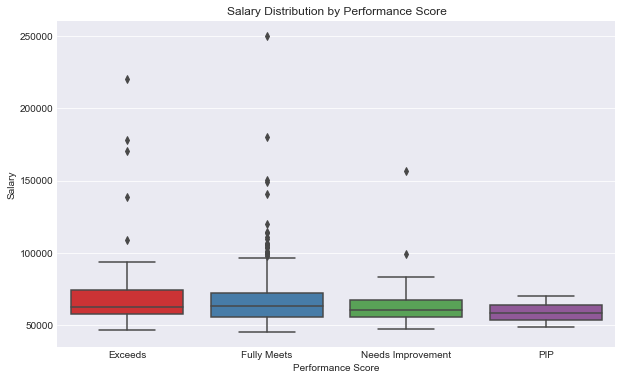

In [3]:
# Salary Analysis
# Looking at the distribution of salaries and its relationships with other factors

# Plotting the distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True, color='skyblue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Analyzing salary by Department
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df, palette='Set2')
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

# Analyzing salary by Position
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Salary', data=df, palette='Set3')
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

# Analyzing salary by Performance Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='Salary', data=df, palette='Set1')
plt.title('Salary Distribution by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Salary')
plt.show()



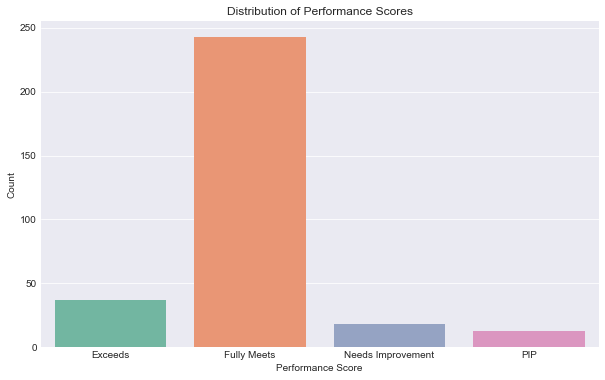

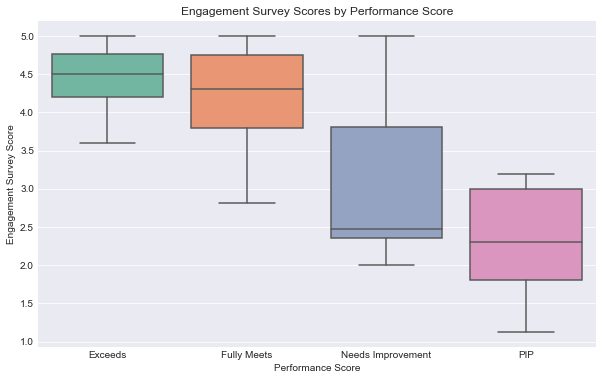

In [4]:
# Performance Analysis
# Exploring the relationship between performance scores and other variables

# Plotting the distribution of performance scores
plt.figure(figsize=(10, 6))
sns.countplot(x='PerformanceScore', data=df, palette='Set2')
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()

# Analyzing the relationship between Engagement Survey and Performance Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='EngagementSurvey', data=df, palette='Set2')
plt.title('Engagement Survey Scores by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Engagement Survey Score')
plt.show()



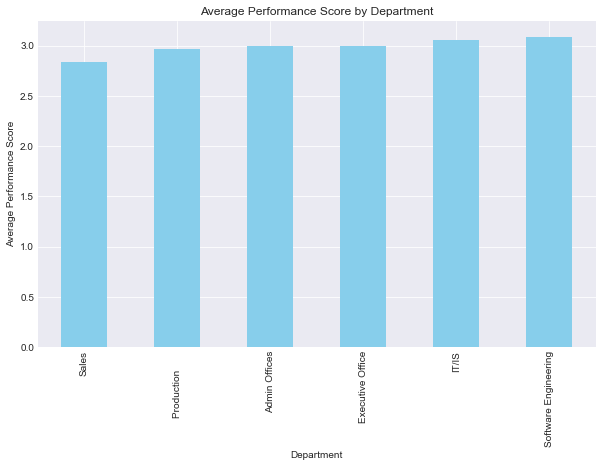

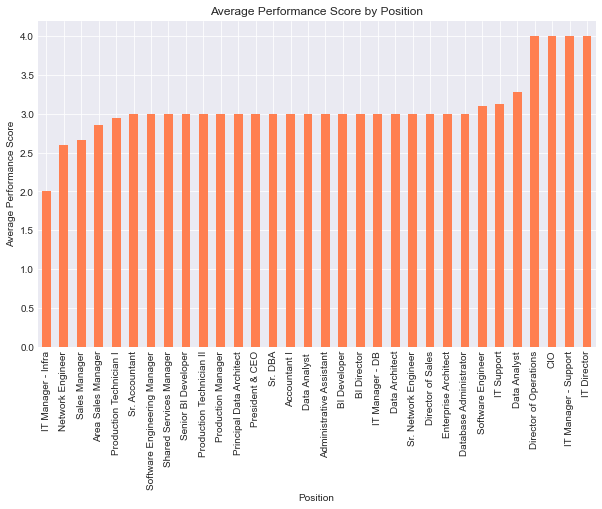

In [5]:
# Calculating the average performance score by Department and Position
# Since PerformanceScore is categorical, we first need to map these to a numerical scale for averaging

# Calculating average performance score by Department
avg_perf_by_dept = df.groupby('Department')['PerfScoreID'].mean().sort_values()

# Calculating average performance score by Position
avg_perf_by_pos = df.groupby('Position')['PerfScoreID'].mean().sort_values()

# Plotting average performance score by Department
plt.figure(figsize=(10, 6))
avg_perf_by_dept.plot(kind='bar', color='skyblue')
plt.title('Average Performance Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Score')
plt.show()

# Plotting average performance score by Position
plt.figure(figsize=(10, 6))
avg_perf_by_pos.plot(kind='bar', color='coral')
plt.title('Average Performance Score by Position')
plt.xlabel('Position')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=90)
plt.show()



I feel like the counts of the score goes some way to identifying why the averages are so consistent across the board

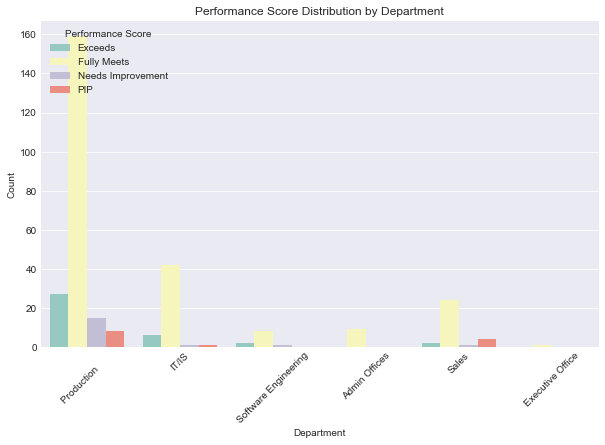

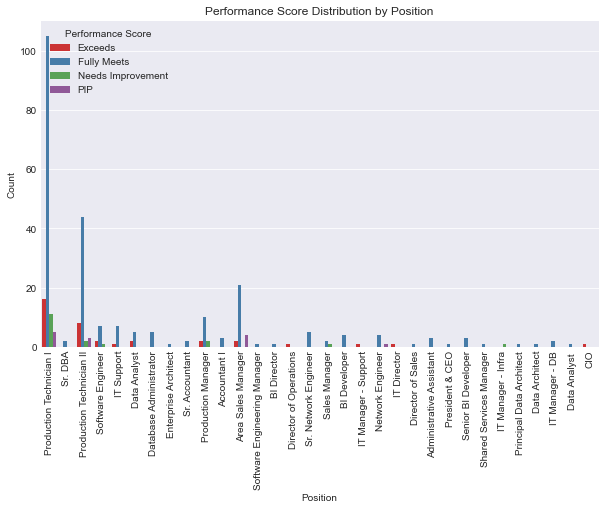

In [6]:
# Analyzing performance score by Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='PerformanceScore', data=df, palette='Set3')
plt.title('Performance Score Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Performance Score')
plt.show()

# Analyzing performance score by Position
plt.figure(figsize=(10, 6))
sns.countplot(x='Position', hue='PerformanceScore', data=df, palette='Set1')
plt.title('Performance Score Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Performance Score')
plt.show()

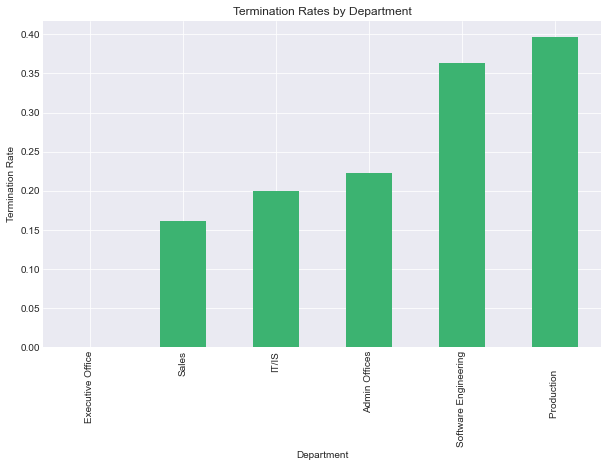

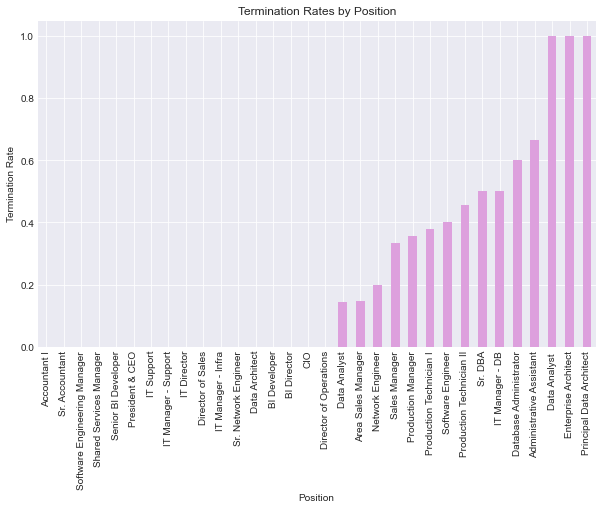

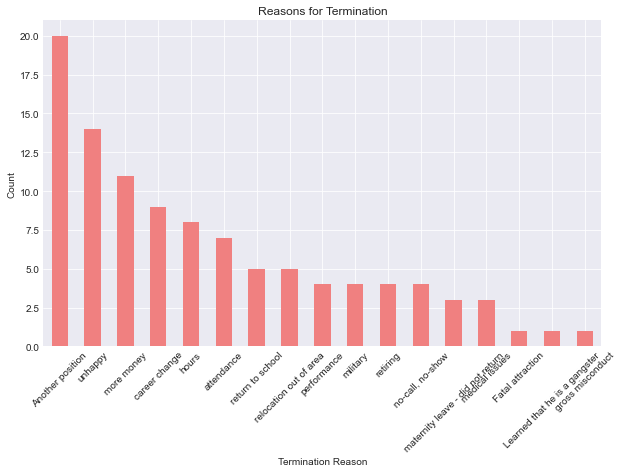

In [7]:
# Retention Analysis
# Exploring patterns in terminations and related factors

# Analyzing termination rates by Department
term_rate_dept = df.groupby('Department')['Termd'].mean().sort_values()

# Analyzing termination rates by Position
term_rate_pos = df.groupby('Position')['Termd'].mean().sort_values()

# Analyzing the reasons for termination
term_reasons = df[df['Termd'] == 1]['TermReason'].value_counts()

# Plotting termination rates by Department
plt.figure(figsize=(10, 6))
term_rate_dept.plot(kind='bar', color='mediumseagreen')
plt.title('Termination Rates by Department')
plt.xlabel('Department')
plt.ylabel('Termination Rate')
plt.show()

# Plotting termination rates by Position
plt.figure(figsize=(10, 6))
term_rate_pos.plot(kind='bar', color='plum')
plt.title('Termination Rates by Position')
plt.xlabel('Position')
plt.ylabel('Termination Rate')
plt.xticks(rotation=90)
plt.show()

# Plotting reasons for termination
plt.figure(figsize=(10, 6))
term_reasons.plot(kind='bar', color='lightcoral')
plt.title('Reasons for Termination')
plt.xlabel('Termination Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



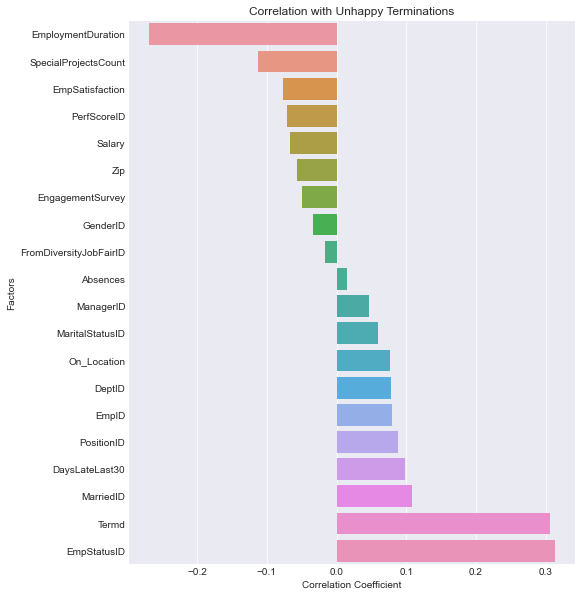

In [8]:
# To analyze correlations with the specific "unhappy" termination reason, we first identify these cases in the dataset
df['IsUnhappyTermination'] = (df['TermReason'].str.lower() == 'unhappy')

# Now, we'll calculate the correlation of this 'IsUnhappyTermination' with other columns in the dataset
# We'll focus on numerical columns as they are more suitable for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix_unhappy = df[numerical_columns].corrwith(df['IsUnhappyTermination']).sort_values()

# Plotting the correlations
plt.figure(figsize=(8, 10))
sns.barplot(x=correlation_matrix_unhappy, y=correlation_matrix_unhappy.index)
plt.title('Correlation with Unhappy Terminations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Factors')
plt.show()



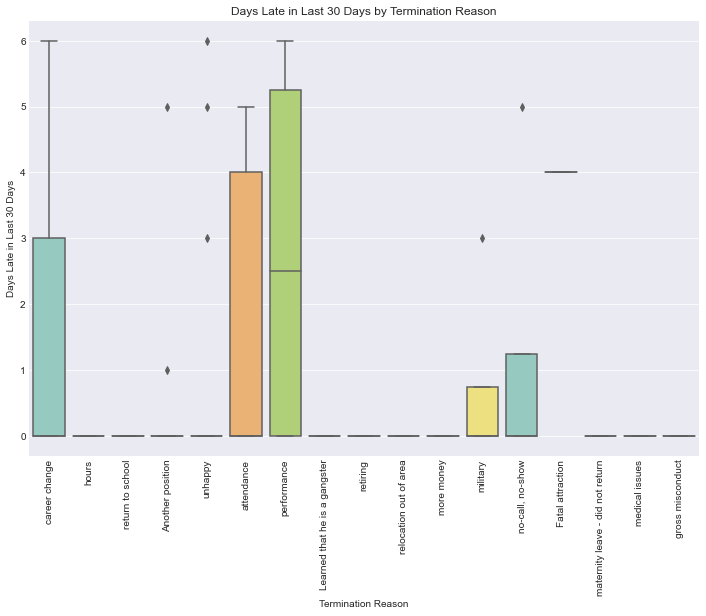

In [9]:
# Replotting the comparison of 'Days Late in Last 30 Days' by Termination Reason with vertical x-axis labels

# Filtering data to include only terminated employees
terminated_employees = df[df['Termd'] == 1]

plt.figure(figsize=(12, 8))
sns.boxplot(x='TermReason', y='DaysLateLast30', data=terminated_employees, palette='Set3')
plt.title('Days Late in Last 30 Days by Termination Reason')
plt.xlabel('Termination Reason')
plt.ylabel('Days Late in Last 30 Days')
plt.xticks(rotation=90)  # Setting the x-axis labels to be fully vertical
plt.show()



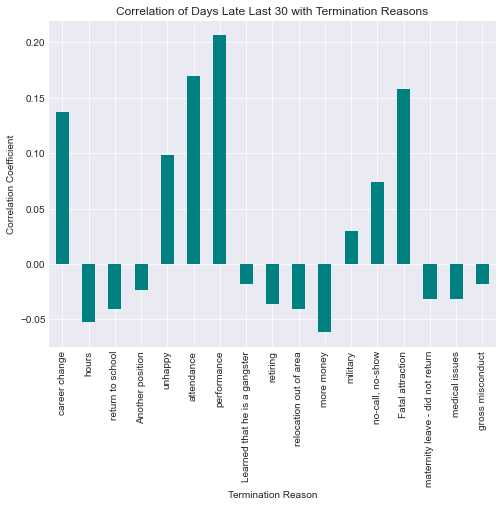

In [10]:
# Replotting the correlation of 'Days Late Last 30' with termination reasons with vertical x-axis labels

# Getting unique termination reasons
termination_reasons = terminated_employees['TermReason'].unique()

# Creating binary columns for each termination reason
for reason in termination_reasons:
    df[reason] = df['TermReason'] == reason

# Correlation of DaysLateLast30 with each termination reason
termination_reason_correlations = df[[reason for reason in termination_reasons]].corrwith(df['DaysLateLast30'])

plt.figure(figsize=(8, 6))
termination_reason_correlations.plot(kind='bar', color='teal')
plt.title('Correlation of Days Late Last 30 with Termination Reasons')
plt.xlabel('Termination Reason')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)  # Setting the x-axis labels to be fully vertical
plt.show()



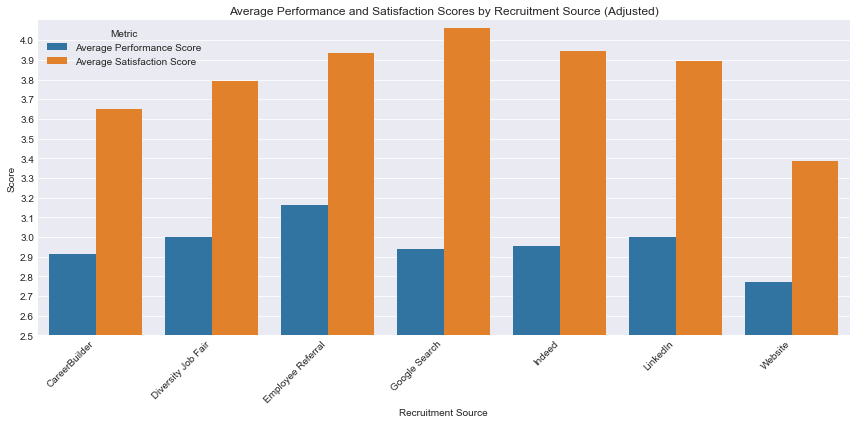

In [11]:
# Messy code from a few diff things from CGPT
# To analyze the effectiveness of different recruitment sources, we can look at metrics such as:
# 1. Number of hires from each source.
# 2. Average performance score of employees recruited from each source.
# 3. Average employee satisfaction score from each source.
# 4. Average salary of employees from each source (to see if certain sources tend to bring in higher-paid positions).
# 5. Average tenure or attrition rate (if available in the data).

# First, we'll calculate the number of hires from each recruitment source.
recruitment_counts = df['RecruitmentSource'].value_counts()

# Next, we calculate the average performance score, employee satisfaction score, and average salary for each source.
avg_performance = df.groupby('RecruitmentSource')['PerfScoreID'].mean()
avg_satisfaction = df.groupby('RecruitmentSource')['EmpSatisfaction'].mean()
avg_salary = df.groupby('RecruitmentSource')['Salary'].mean()

# Combining these metrics into a single dataframe for analysis.
recruitment_effectiveness = pd.DataFrame({
    'Hire Count': recruitment_counts,
    'Average Performance Score': avg_performance,
    'Average Satisfaction Score': avg_satisfaction,
    'Average Salary': avg_salary
})

recruitment_effectiveness.sort_values(by='Hire Count', ascending=False)


# Correcting the data preparation for the bar chart
# The 'RecruitmentSource' column needs to be correctly referenced from the recruitment_effectiveness dataframe.

# Resetting the index to include 'RecruitmentSource' as a column
recruitment_effectiveness_reset = recruitment_effectiveness.reset_index()

# Renaming the 'index' column to 'RecruitmentSource'
recruitment_effectiveness_reset.rename(columns={'index': 'RecruitmentSource'}, inplace=True)

# Preparing the data for the bar chart
bar_data = recruitment_effectiveness_reset[['RecruitmentSource', 'Average Performance Score', 'Average Satisfaction Score']]
bar_data = bar_data.melt(id_vars='RecruitmentSource', var_name='Metric', value_name='Score')



# Filtering out the specified recruitment sources
filtered_bar_data = bar_data[~bar_data['RecruitmentSource'].isin(['Other', 'On-line Web application'])]

# Creating the adjusted bar chart
plt.figure(figsize=(12, 6))
adjusted_bar_chart = sns.barplot(x='RecruitmentSource', y='Score', hue='Metric', data=filtered_bar_data)
plt.xticks(rotation=45, ha='right')
plt.ylim(2.5, 4.1)  # Setting the y-axis limits
plt.yticks(np.arange(2.5, 4.1, 0.1))  # Setting ticks at every 0.1
plt.title('Average Performance and Satisfaction Scores by Recruitment Source (Adjusted)')
plt.xlabel('Recruitment Source')
plt.ylabel('Score')
plt.legend(title='Metric')

# Display the adjusted chart
plt.tight_layout()
plt.show()


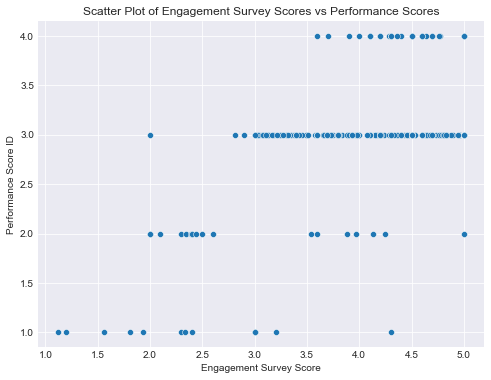

,PerfScoreID,EngagementSurvey
PerfScoreID,1.000000,0.544927
EngagementSurvey,0.544927,1.000000


In [12]:
# For the Performance and Engagement Analysis, we will look at the relationship between the performance score
# and the engagement survey results. We'll use scatter plots and correlation analysis for this purpose.

# Extracting relevant columns for analysis
performance_engagement_data = df[['PerfScoreID', 'EngagementSurvey']]

# Calculating the correlation
correlation = performance_engagement_data.corr()

# Creating a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=performance_engagement_data, x='EngagementSurvey', y='PerfScoreID')
plt.title('Scatter Plot of Engagement Survey Scores vs Performance Scores')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Performance Score ID')
plt.show()

correlation


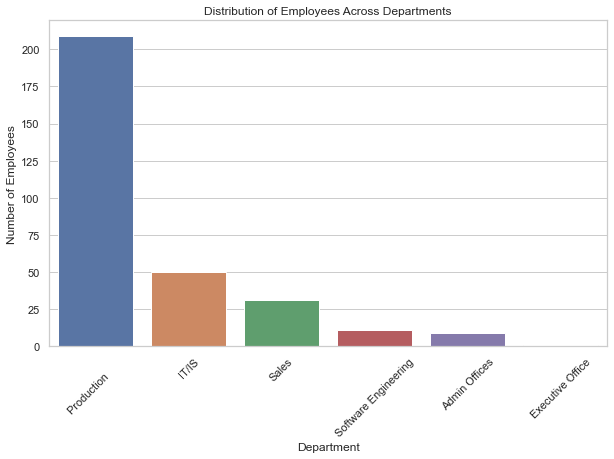

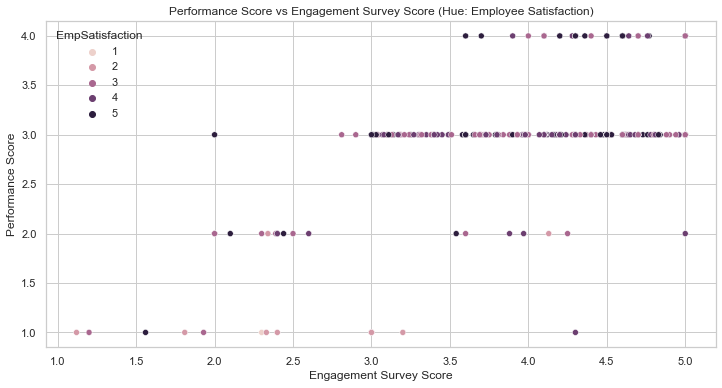

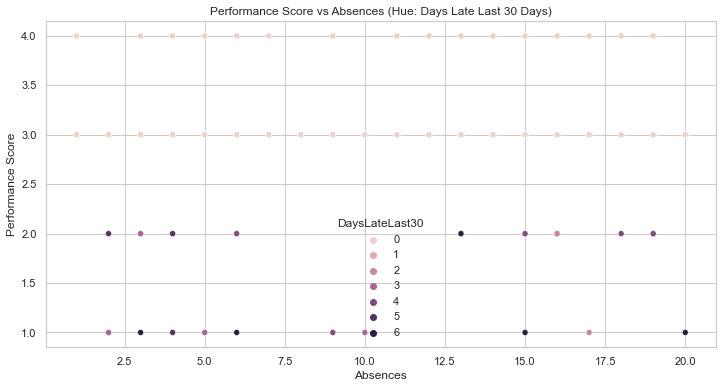

In [13]:
# Proceeding with the analysis phase for insights related to workforce efficiency and allocation.

# Key areas of focus:
# 1. Analyzing the distribution of employees across different departments.
# 2. Exploring the relationship between performance scores and other factors like engagement, satisfaction, and salary.
# 3. Identifying patterns in absences and lateness in relation to performance and engagement.

import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set(style="whitegrid")

# 1. Distribution of Employees Across Departments
department_distribution = df['Department'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=department_distribution.index, y=department_distribution.values)
plt.title('Distribution of Employees Across Departments')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

# 2. Relationship Between Performance Scores, Engagement, and Satisfaction
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EngagementSurvey', y='PerfScoreID', data=df, hue='EmpSatisfaction')
plt.title('Performance Score vs Engagement Survey Score (Hue: Employee Satisfaction)')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Performance Score')
plt.show()

# 3. Patterns in Absences and Lateness
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Absences', y='PerfScoreID', data=df, hue='DaysLateLast30')
plt.title('Performance Score vs Absences (Hue: Days Late Last 30 Days)')
plt.xlabel('Absences')
plt.ylabel('Performance Score')
plt.show()


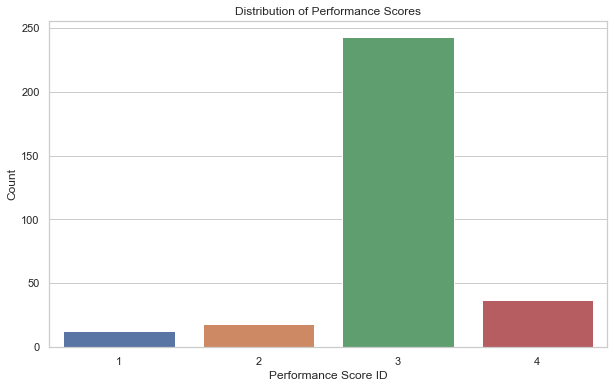

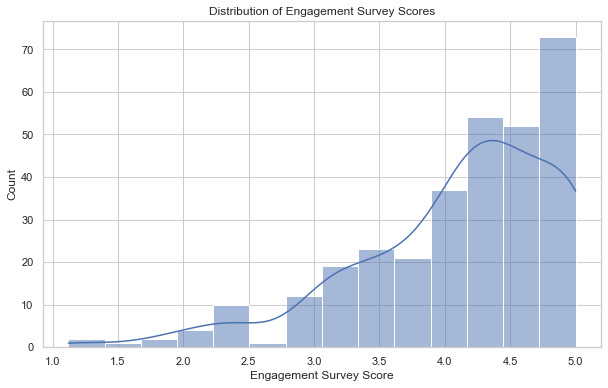

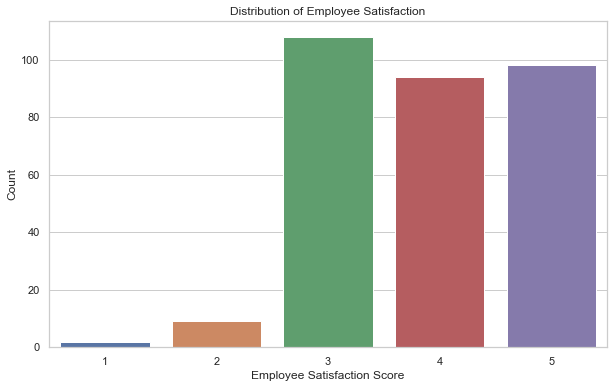

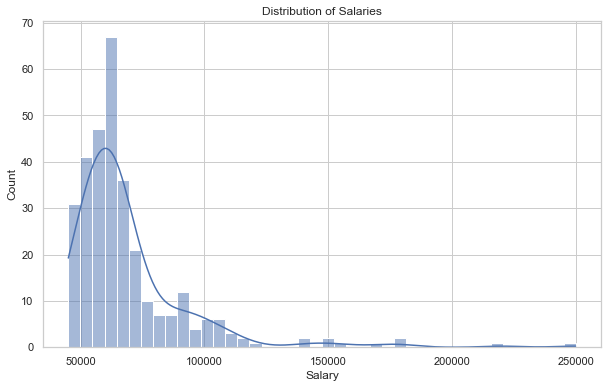

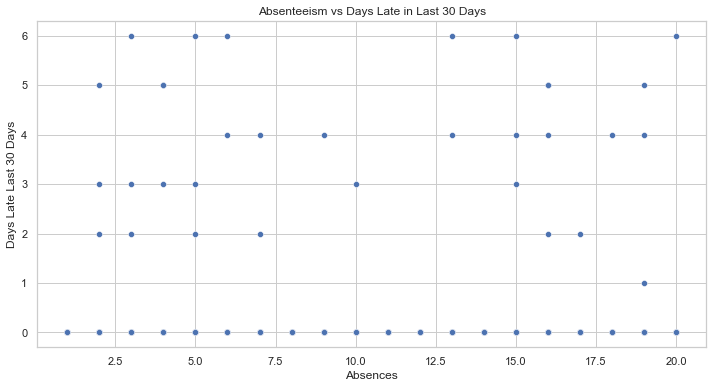

In [14]:
# Setting plot style for better visualization
sns.set(style="whitegrid")

# 1. Understanding Distributions and Trends
# Distribution of Performance Scores
plt.figure(figsize=(10, 6))
sns.countplot(x='PerfScoreID', data=df)
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score ID')
plt.ylabel('Count')
plt.show()

# Distribution of Engagement Survey Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['EngagementSurvey'], kde=True)
plt.title('Distribution of Engagement Survey Scores')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Count')
plt.show()

# Distribution of Employee Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='EmpSatisfaction', data=df)
plt.title('Distribution of Employee Satisfaction')
plt.xlabel('Employee Satisfaction Score')
plt.ylabel('Count')
plt.show()

# Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

# Trends in Absenteeism and Days Late
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Absences', y='DaysLateLast30', data=df)
plt.title('Absenteeism vs Days Late in Last 30 Days')
plt.xlabel('Absences')
plt.ylabel('Days Late Last 30 Days')
plt.show()


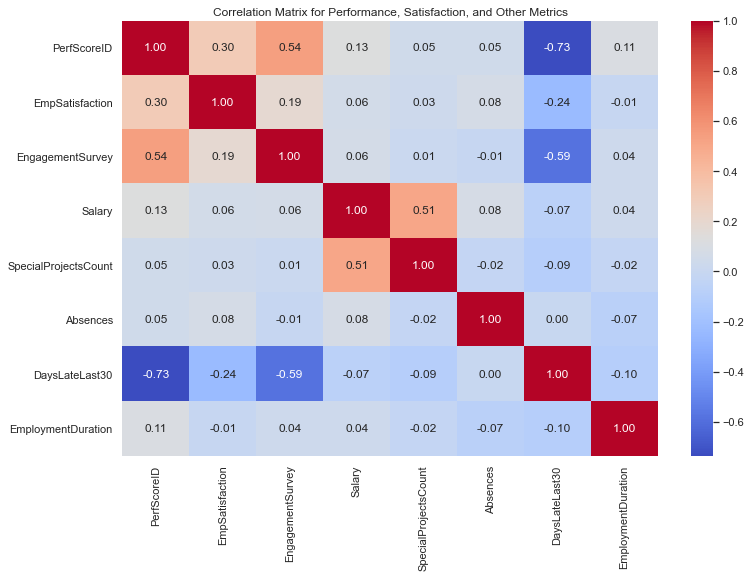

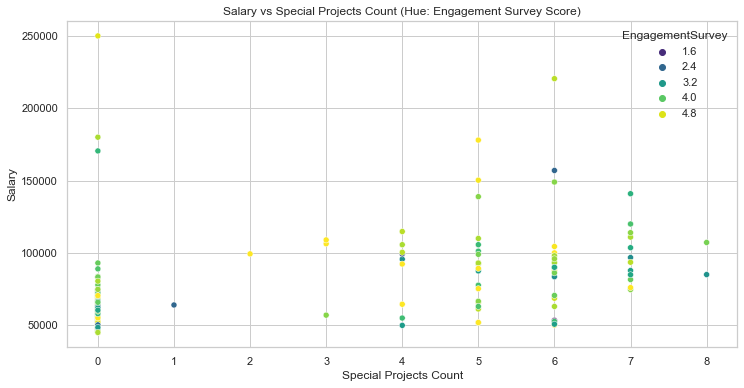

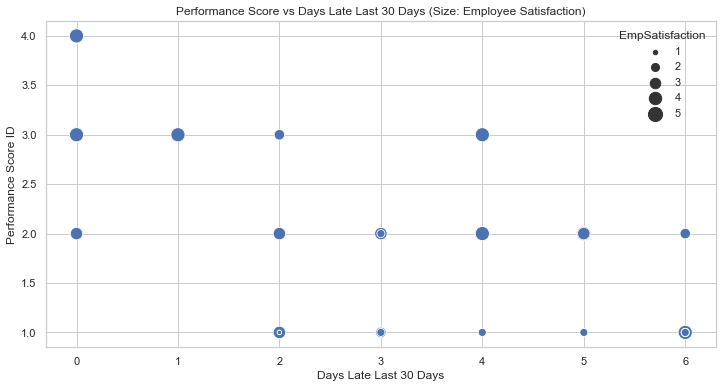

In [15]:
# EDA: Correlation Analysis
correlation_matrix = df[['PerfScoreID', 'EmpSatisfaction', 'EngagementSurvey', 'Salary', 
                                 'SpecialProjectsCount', 'Absences', 'DaysLateLast30', 'EmploymentDuration']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Performance, Satisfaction, and Other Metrics')
plt.show()

# EDA: Visualizations
# Scatter plot for Salary vs Special Projects Count (Hue: Engagement Survey Score)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='SpecialProjectsCount', y='Salary', hue='EngagementSurvey', palette='viridis')
plt.title('Salary vs Special Projects Count (Hue: Engagement Survey Score)')
plt.xlabel('Special Projects Count')
plt.ylabel('Salary')
plt.show()

# Scatter plot for Performance Score vs Days Late Last 30 Days (Size: Employee Satisfaction)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='DaysLateLast30', y='PerfScoreID', size='EmpSatisfaction', sizes=(20, 200))
plt.title('Performance Score vs Days Late Last 30 Days (Size: Employee Satisfaction)')
plt.xlabel('Days Late Last 30 Days')
plt.ylabel('Performance Score ID')
plt.show()


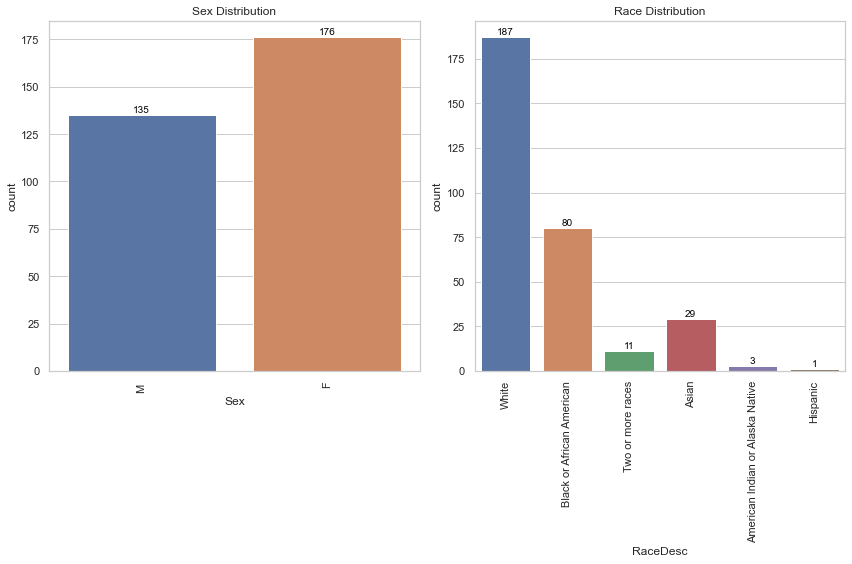

In [16]:
# Adding the counts on top of each bar in the Sex and Race distribution plots

# Creating a figure for the two graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plotting Sex Distribution and adding counts
sns.countplot(data=df, x='Sex', ax=axes[0])
axes[0].set_title('Sex Distribution')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotating x-axis labels vertically
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Plotting Race Distribution and adding counts
sns.countplot(data=df, x='RaceDesc', ax=axes[1])
axes[1].set_title('Race Distribution')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Rotating x-axis labels vertically
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()



**Sex Distribution:** Each bar representing a gender category now displays the total count of employees in that category.

**Race Distribution:** Similarly, each racial category bar is labeled with the total number of employees belonging to that race.

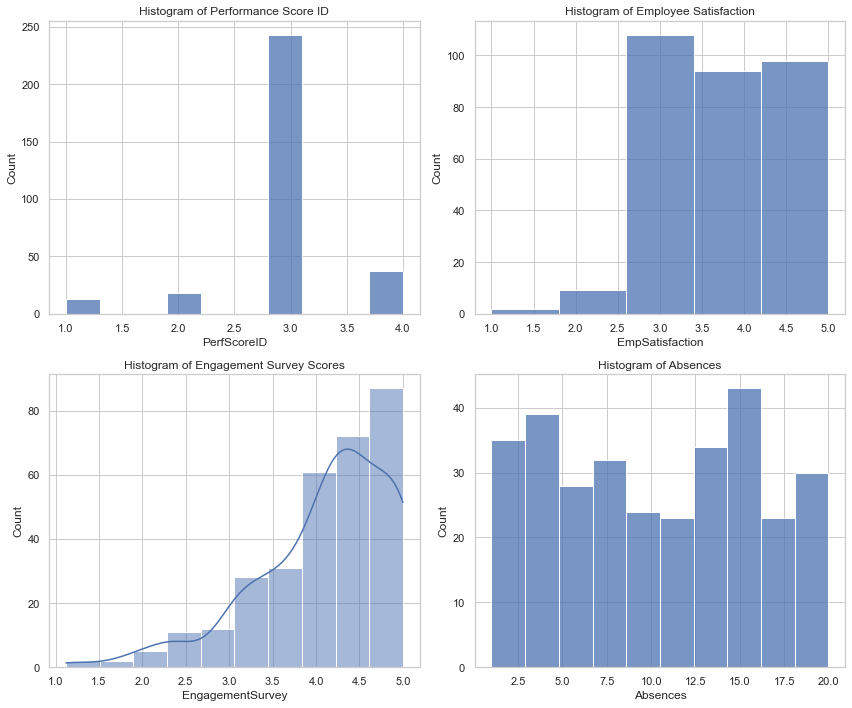

In [17]:
# Creating individual histograms for the specified columns

# Setting up the plotting area
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting histograms
sns.histplot(df['PerfScoreID'], bins=10, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Performance Score ID')

sns.histplot(df['EmpSatisfaction'], bins=5, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Employee Satisfaction')

sns.histplot(df['EngagementSurvey'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Engagement Survey Scores')

sns.histplot(df['Absences'], bins=10, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Absences')

plt.tight_layout()
plt.show()


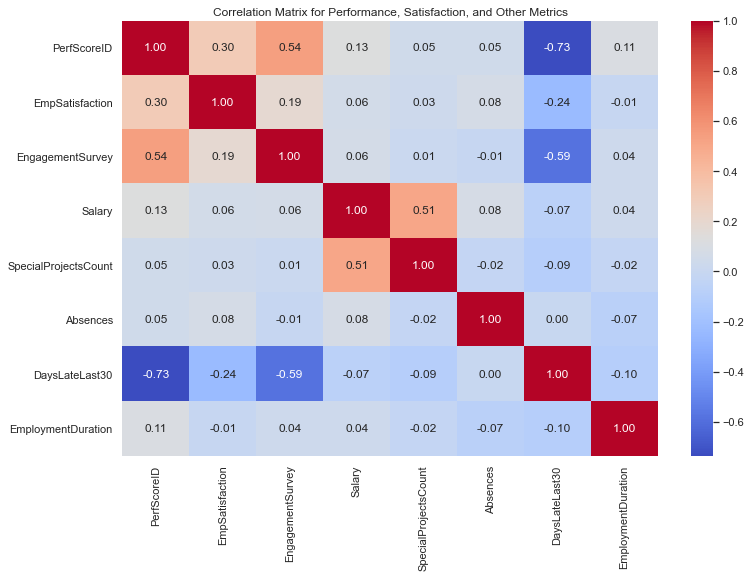

In [18]:
# Objective One: Identifying Trends Related to Increasing Performance and Satisfaction

# Correlation analysis to find relationships between performance scores, satisfaction, and other metrics
correlation_matrix = df[['PerfScoreID', 'EmpSatisfaction', 'EngagementSurvey', 'Salary', 
                                 'SpecialProjectsCount', 'Absences', 'DaysLateLast30', 'EmploymentDuration']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Performance, Satisfaction, and Other Metrics')
plt.show()


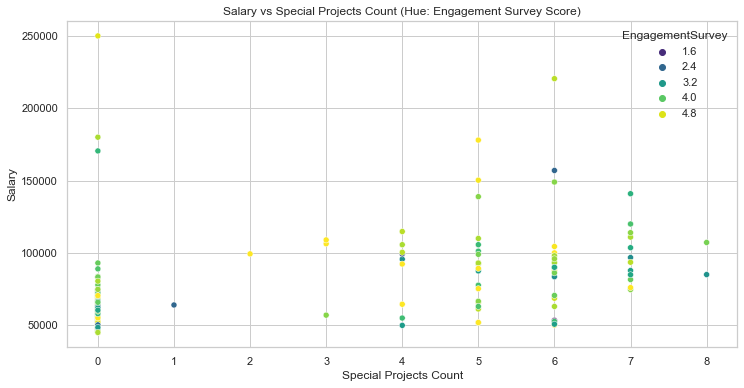

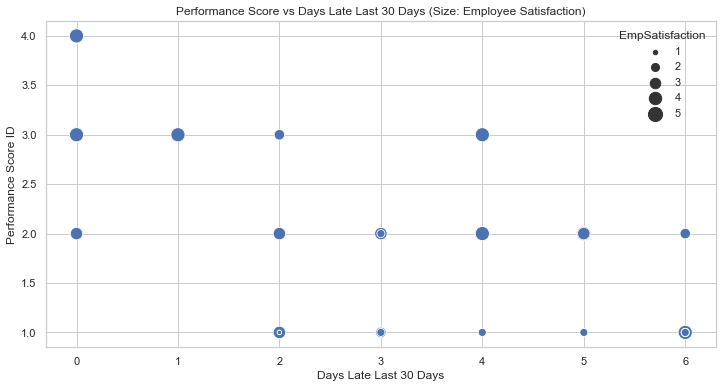

In [19]:
# EDA: Visualizations
# Scatter plot for Salary vs Special Projects Count (Hue: Engagement Survey Score)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='SpecialProjectsCount', y='Salary', hue='EngagementSurvey', palette='viridis')
plt.title('Salary vs Special Projects Count (Hue: Engagement Survey Score)')
plt.xlabel('Special Projects Count')
plt.ylabel('Salary')
plt.show()

# Scatter plot for Performance Score vs Days Late Last 30 Days (Size: Employee Satisfaction)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='DaysLateLast30', y='PerfScoreID', size='EmpSatisfaction', sizes=(20, 200))
plt.title('Performance Score vs Days Late Last 30 Days (Size: Employee Satisfaction)')
plt.xlabel('Days Late Last 30 Days')
plt.ylabel('Performance Score ID')
plt.show()


**Key Insights:**

 - **Positive Correlation Among Satisfaction, Engagement, and Performance:** Employees who are more engaged and satisfied with their work tend to perform better. This suggests that initiatives aimed at boosting engagement and satisfaction are likely to have a positive impact on performance.
   - Further, it becomes imperative to ensure that those in our workforce are doing well, mentally and emotionally

 - **Negative Correlation with Lateness:** The negative correlation between these positive factors and lateness underscores the importance of punctuality and reliability as indicators of employee commitment and professionalism.

There also appears to be a high correlation between those who are engaged in special projects and salary.  This could suggest that those who wish to increase their salaries could look into engaging special projects, if they find that to be a possibility for them and their position.

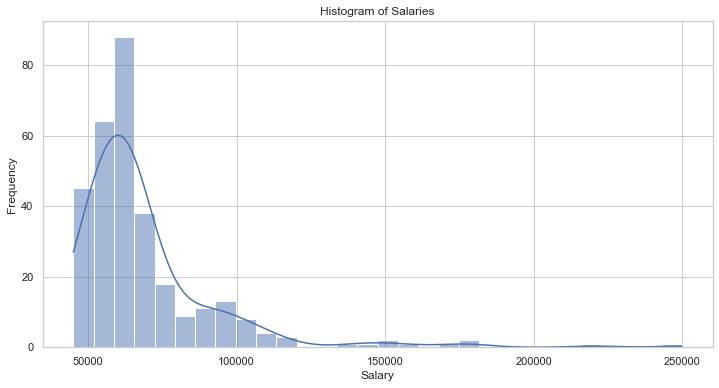

In [20]:
# Creating a histogram for the 'Salary' column
plt.figure(figsize=(12, 6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Histogram of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

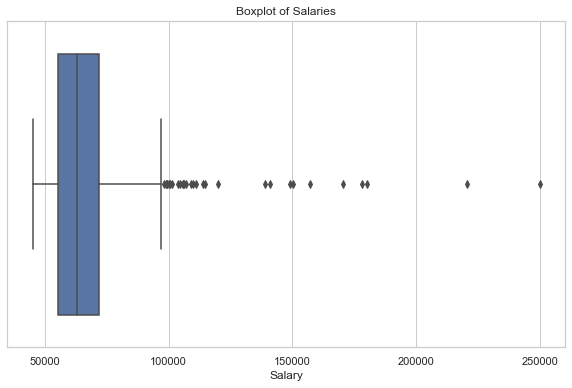

In [21]:
# Creating a boxplot for the 'Salary' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salaries')
plt.xlabel('Salary')
plt.show()


In [22]:
# Calculating the mean, median, mode, and standard deviation for the 'Salary' column
print(f"Mean Salary: {df['Salary'].mean()}")
print(f"Median Salary: {df['Salary'].median()}")
print(f"Mode Salary: {df['Salary'].mode()[0]}")
print(f"Standard Deviation of Salary: {df['Salary'].std()}")

Mean Salary: 69020.6848874598
Median Salary: 62810.0
Mode Salary: 57815
Standard Deviation of Salary: 25156.636929646647


In [24]:
# Filtering the dataset to find all rows where the termination reason is "Learned that he is a gangster"

gangster_termination_rows = df[df['TermReason'].str.lower() == "learned that he is a gangster"]
gangster_termination_rows.T


,25
Employee_Name,"Booth, Frank"
EmpID,10199
MarriedID,0
MaritalStatusID,0
GenderID,1
EmpStatusID,4
DeptID,3
PerfScoreID,3
FromDiversityJobFairID,0
Salary,103613


## Code Recycling

# Scatter plot to compare Churn Risk Score with Salary
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['EmploymentStatus'].str.contains('Active')], x='Salary', y='ChurnRiskScore')
plt.title('Churn Risk Score vs Salary (Non-Terminated Employees)')
plt.xlabel('Salary')
plt.ylabel('Churn Risk Score')
plt.show()


In [ ]:
## For Simple, non-mathimatic EDA



#df = df.drop(["EmpID", "MarriedID", "MaritalStatusID", "GenderID", "EmpStatusID", 
#    "DeptID", "PositionID", "Zip", "CitizenDesc", "DateofHire", 
#    "DateofTermination", "ManagerID", "LastPerformanceReview_Date"], axis = 1)
#df.head()